# Visualizing Distributions

In [1]:
%run helper.py

In [2]:
df = sns.load_dataset("penguins")
df.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


## Histograms and Box Plots

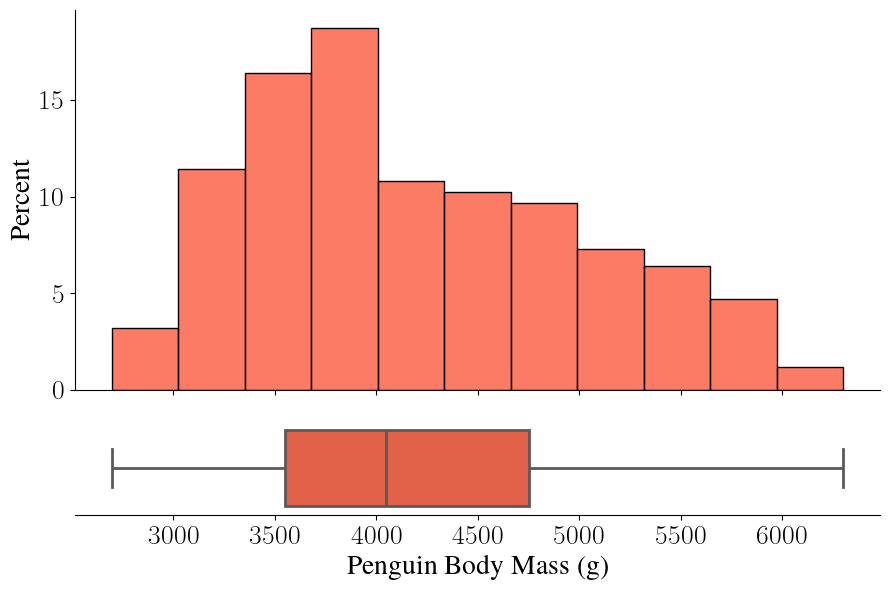

In [3]:
fig, ax = plt.subplots(2,1, figsize=(9,6), sharex=True, height_ratios=(4,1))
sns.histplot(df, x="body_mass_g", stat="percent", bins="auto", color=cc.glasbey_hv[1], ax=ax[0])
sns.boxplot(df, x="body_mass_g", color=cc.glasbey_hv[1], whis=(0,100), ax=ax[-1], linewidth=2)
ax[-1].set_xlabel("Penguin Body Mass (g)")
sns.despine(ax=ax[0])
sns.despine(ax=ax[-1], left=True)
ax[-1].set_yticks([])
plt.tight_layout()
plt.savefig("../figures/histogram_vs_box-penguins.pdf", bbox_inches="tight", transparent=True)

### Box-plot explainer

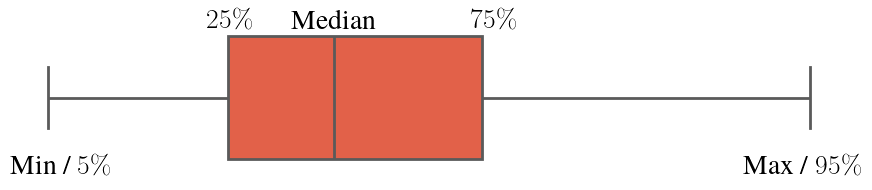

In [4]:
fig, ax = plt.subplots(1,1, figsize=(9,2))
sns.boxplot(df, x="body_mass_g", color=cc.glasbey_hv[1], linewidth=2)
ax.set_xlabel("")
sns.despine(fig, left=True, bottom=True)
ax.set_yticks([])
ax.set_xticks([])
ax.annotate(r"Min / $5\%$", (0,0), xycoords="axes fraction", fontsize=20)
ax.annotate(r"Max / $95\%$", (0.875,0), xycoords="axes fraction", fontsize=20)
ax.annotate(r"$25\%$", (0.235,0.95), xycoords="axes fraction", fontsize=20)
ax.annotate(r"$75\%$", (0.55,0.95), xycoords="axes fraction", fontsize=20)
ax.annotate(r"Median", (0.335,0.95), xycoords="axes fraction", fontsize=20)
plt.tight_layout()
plt.savefig("../figures/box-explainer.pdf", bbox_inches="tight", transparent=True)

### On the relevance of binning

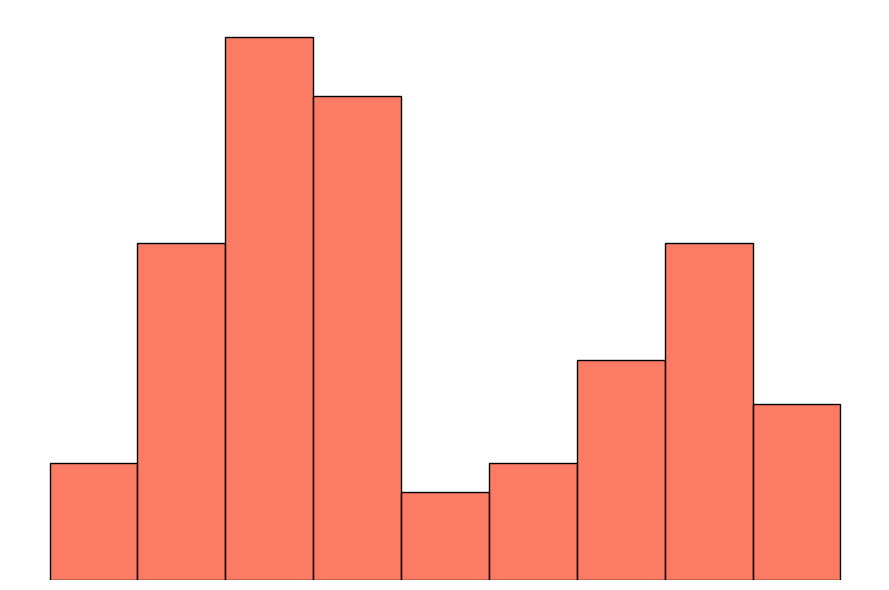

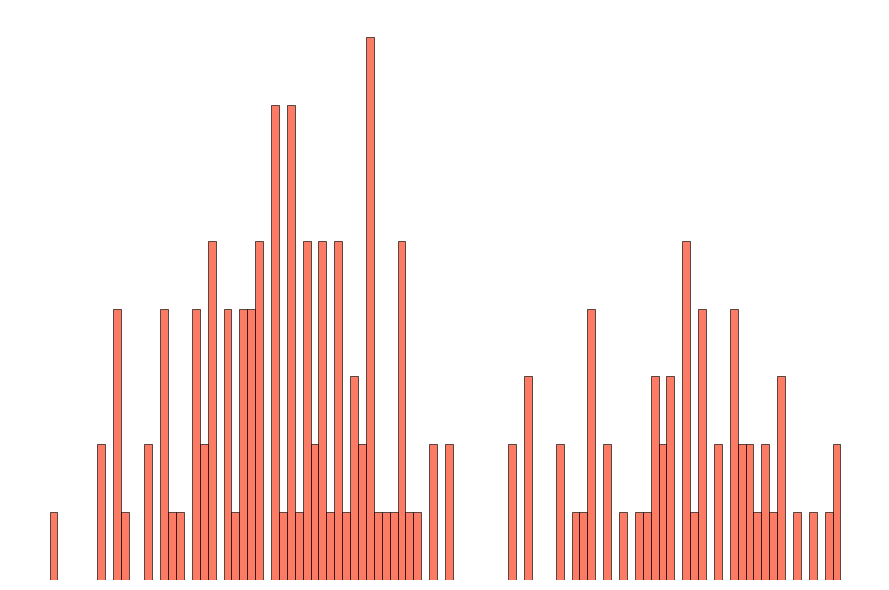

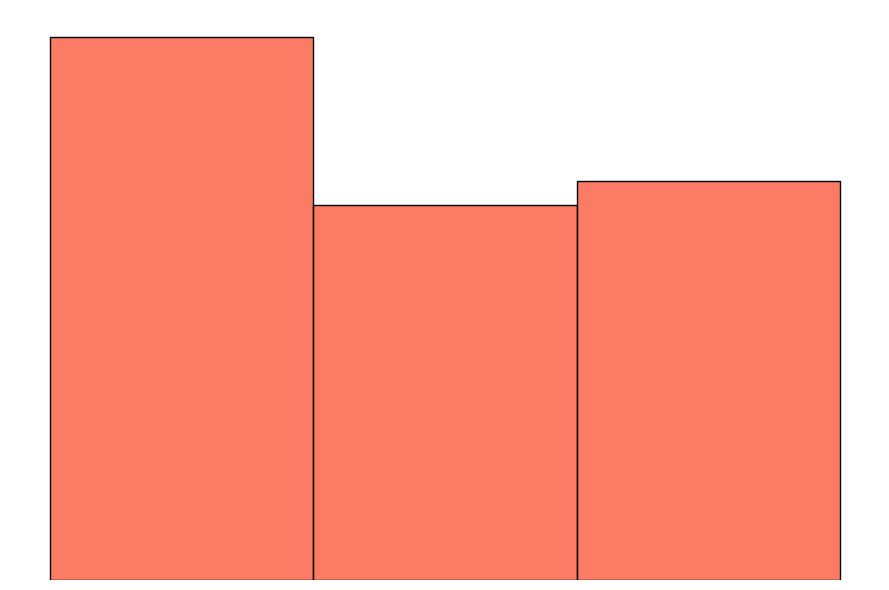

In [5]:
for nbins in ["auto", 100, 3]:
    fig, ax = plt.subplots(1,1, figsize=(9,6))
    sns.histplot(df.query("sex == 'Female'"), x="body_mass_g", stat="percent", bins=nbins, color=cc.glasbey_hv[1])
    ax.set_xlabel("")
    ax.set_ylabel("")
    sns.despine(fig, left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig(f"../figures/histogram_penguins-female_nbins-{nbins}.pdf", bbox_inches="tight", transparent=True)

## Kernel Density Estimation (KDE)

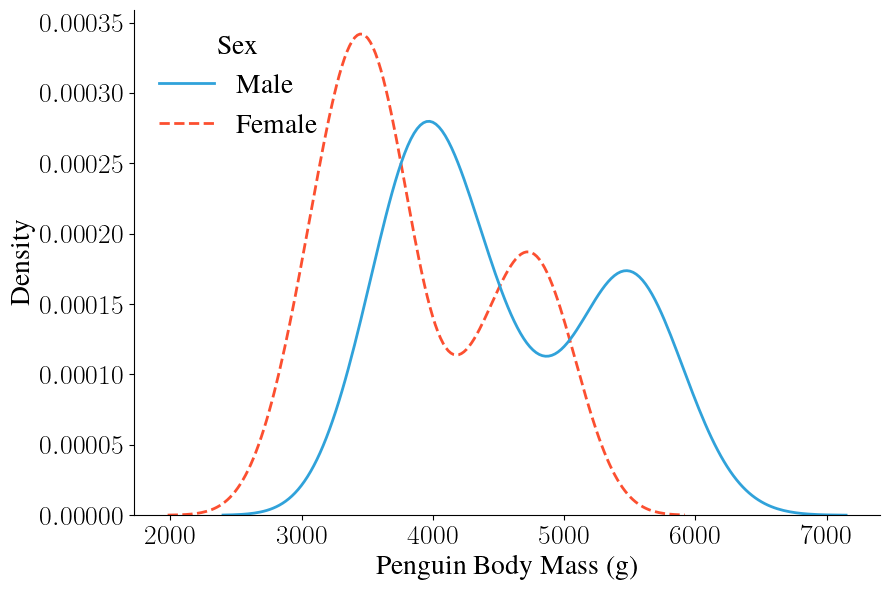

In [6]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.kdeplot(df, x="body_mass_g", hue="sex", palette=cc.glasbey_hv[:2], lw=2, ax=ax)
ax.lines[0].set_linestyle("--")
ax.legend_.set_title("Sex")
sns.move_legend(ax, loc="upper left")
ax.set_xlabel("Penguin Body Mass (g)")
lines = ax.legend_.get_lines()
lines[1].set_linestyle("--")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/kde-penguins_sex.pdf", bbox_inches="tight", transparent=True)

## Empirical Cumulative Distribution Functions (ECDF)

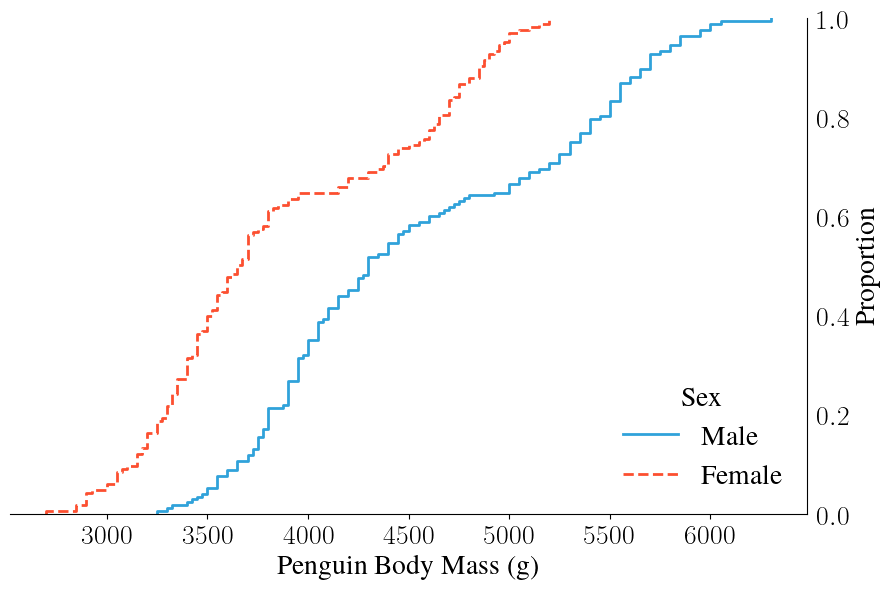

In [7]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.ecdfplot(df, x="body_mass_g", hue="sex", palette=cc.glasbey_hv[:2], lw=2, ax=ax)
ax.lines[0].set_linestyle("--")
ax.legend_.set_title("Sex")
sns.move_legend(ax, loc="lower right")
ax.set_xlabel("Penguin Body Mass (g)")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
lines = ax.legend_.get_lines()
lines[1].set_linestyle("--")
sns.despine(fig, left=True, right=False)
plt.tight_layout()
plt.savefig(f"../figures/ecdf-penguins_sex.pdf", bbox_inches="tight", transparent=True)

## Rug Plots

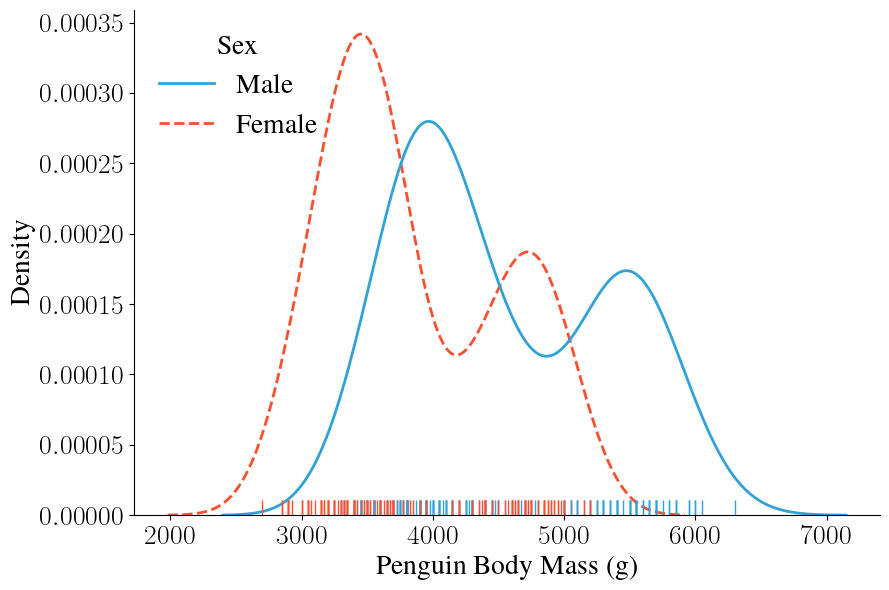

In [8]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.kdeplot(df, x="body_mass_g", hue="sex", palette=cc.glasbey_hv[:2], lw=2, ax=ax)
sns.rugplot(df, x="body_mass_g", hue="sex", palette=cc.glasbey_hv[:2], lw=2, ax=ax, height=0.03, 
            expand_margins=False, legend=False)
ax.lines[0].set_linestyle("--")
ax.legend_.set_title("Sex")
sns.move_legend(ax, loc="upper left")
ax.set_xlabel("Penguin Body Mass (g)")
lines = ax.legend_.get_lines()
lines[1].set_linestyle("--")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/kde_with_rug-penguins_sex.pdf", bbox_inches="tight", transparent=True)

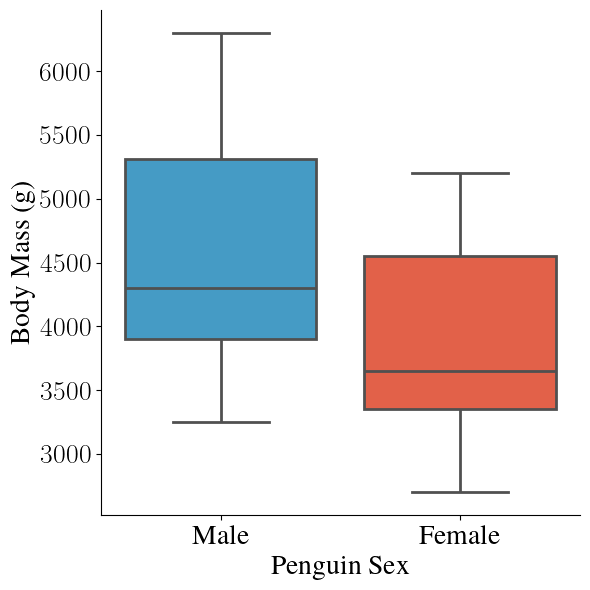

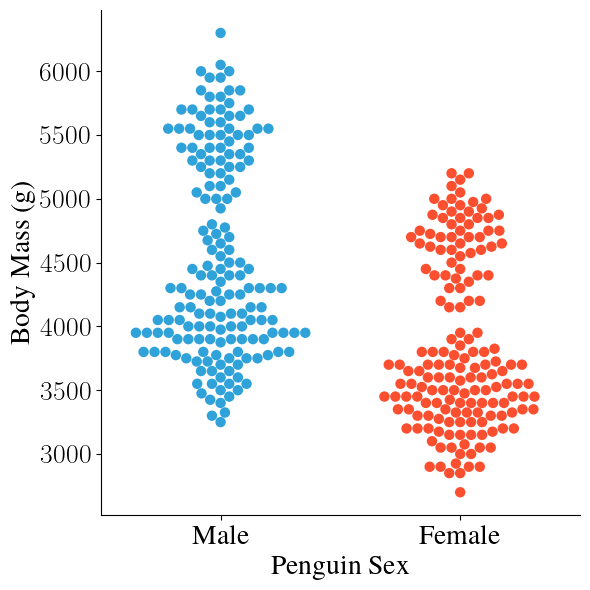

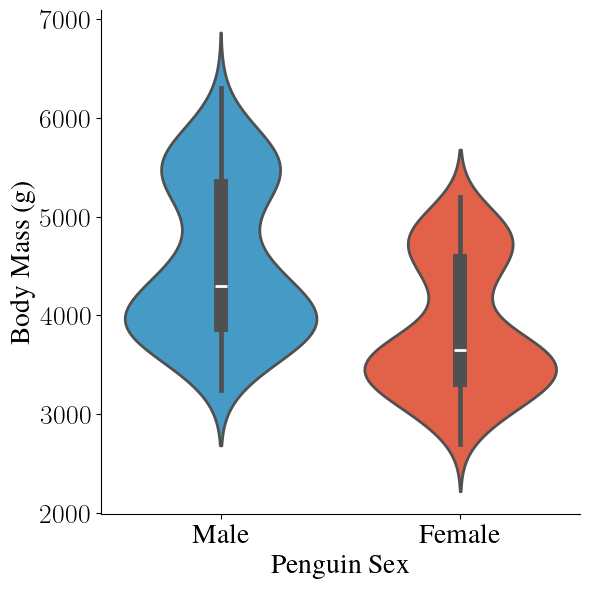

In [9]:
for plot in ["boxplot", "swarmplot", "violinplot"]:
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    kws = dict(x="sex", y="body_mass_g", hue="sex", palette=cc.glasbey_hv[:2], legend=False)
    if plot == "swarmplot":
        kws["s"] = 7.5
        kws["dodge"] = False
    if plot == "violinplot":
        kws["inner_kws"] = dict(box_width=10)
    if plot != "swarmplot":
        kws["linewidth"] = 2
    getattr(sns, plot)(df, **kws)
    ax.set_xticks(ax.get_xticks(), [x.get_text().replace(" (cm)", "") for x in ax.get_xticklabels()])
    ax.set_ylabel("Body Mass (g)")
    ax.set_xlabel("Penguin Sex")
    sns.despine(fig)
    plt.tight_layout()
    plt.savefig(f"../figures/{plot}-penguins.pdf", bbox_inches="tight", transparent=True)